In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

API_URL = "https://api.sportsdata.io/v4/soccer/scores/json"
API_KEY = "3bcc3e8232e2436cbdd1074f512eddd9"


# Análisis Exploratorio de Datos (EDA)

# Areas

In [19]:
def fetch_areas():
    """
    Llama al endpoint /Areas para obtener la lista de áreas (países/regiones).

    Retorna:
      - Una lista de dicts si la llamada fue exitosa.
      - Lanza excepción si hubo error HTTP.
    """
    if not API_KEY:
        raise ValueError("La variable de entorno SPORTSDATA_API_KEY no está configurada")

    url = f"{API_URL}/Areas?key={API_KEY}"
    resp = requests.get(url, timeout=10)
    resp.raise_for_status()
    return resp.json()

def get_area_by_name(name):
    """
    Busca en la lista de áreas por el campo 'Name'
    """
    areas = fetch_areas()
    name_lower = name.lower()
    for area in areas:
        if area.get("Name", "").lower() == name_lower:
            return area
    return None

if __name__ == "__main__":
    # Ejemplo de uso:
    all_areas = fetch_areas()
    df = pd.DataFrame(all_areas)
    print(f"Total de áreas: {len(all_areas)}")
    # Imprime algunas áreas
    for a in all_areas[:10]:
        print(a)

Total de áreas: 292
{'AreaId': 1, 'CountryCode': 'INT', 'Name': 'World', 'Competitions': [{'CompetitionId': 21, 'AreaId': 1, 'AreaName': 'World', 'Name': 'FIFA World Cup', 'Gender': 'Male', 'Type': 'International', 'Format': 'International Cup', 'Key': 'FIFA', 'Seasons': [{'SeasonId': 50, 'CompetitionId': 21, 'Season': 2018, 'Name': '2018 Russia', 'CompetitionName': 'FIFA World Cup', 'StartDate': '2018-06-14T00:00:00', 'EndDate': '2018-07-15T00:00:00', 'CurrentSeason': False, 'Rounds': [{'RoundId': 196, 'SeasonId': 50, 'Season': 2018, 'SeasonType': 1, 'Name': 'Group Stage', 'Type': 'Table', 'StartDate': '2018-06-14T00:00:00', 'EndDate': '2018-06-28T00:00:00', 'CurrentWeek': 3, 'CurrentRound': False, 'Games': [], 'Standings': [], 'TeamSeasons': [], 'PlayerSeasons': []}, {'RoundId': 197, 'SeasonId': 50, 'Season': 2018, 'SeasonType': 3, 'Name': 'Round of 16', 'Type': 'Cup', 'StartDate': '2018-06-30T00:00:00', 'EndDate': '2018-07-03T00:00:00', 'CurrentWeek': None, 'CurrentRound': False, 'G

In [20]:
# Busqueda Por País
esp = get_area_by_name("Spain")
print("\nÁrea para España:", esp)


Área para España: {'AreaId': 176, 'CountryCode': 'ESP', 'Name': 'Spain', 'Competitions': [{'CompetitionId': 4, 'AreaId': 176, 'AreaName': 'Spain', 'Name': 'La Liga', 'Gender': 'Male', 'Type': 'Club', 'Format': 'Domestic League', 'Key': 'ESP', 'Seasons': [{'SeasonId': 4, 'CompetitionId': 4, 'Season': 2016, 'Name': '2015/2016', 'CompetitionName': 'Primera Division', 'StartDate': '2015-08-21T00:00:00', 'EndDate': '2016-05-15T00:00:00', 'CurrentSeason': False, 'Rounds': [{'RoundId': 12, 'SeasonId': 4, 'Season': 2016, 'SeasonType': 1, 'Name': 'Regular Season', 'Type': 'Table', 'StartDate': '2015-08-21T00:00:00', 'EndDate': '2016-05-15T00:00:00', 'CurrentWeek': 38, 'CurrentRound': False, 'Games': [], 'Standings': [], 'TeamSeasons': [], 'PlayerSeasons': []}]}, {'SeasonId': 28, 'CompetitionId': 4, 'Season': 2017, 'Name': '2016/2017', 'CompetitionName': 'Primera Division', 'StartDate': '2016-08-21T00:00:00', 'EndDate': '2017-05-21T00:00:00', 'CurrentSeason': False, 'Rounds': [{'RoundId': 113, 

In [21]:
# --- EDA básico ---
print("Shape del dataset:", df.shape)
print("\nColumnas disponibles:", df.columns.tolist())
print("\nInfo del dataset:")
print(df.info())
print("\nValores nulos:")
print(df.isnull().sum())
print("\nPrimeras filas:")
print(df.head())

# --- Ejemplo: distribución por continente (si existe campo 'RegionName' o similar) ---
if "RegionName" in df.columns:
    region_counts = df["RegionName"].value_counts()
    print("\nÁreas por región:")
    print(region_counts)

    # Gráfica
    plt.figure(figsize=(8,6))
    region_counts.plot(kind="bar", edgecolor="black")
    plt.title("Distribución de áreas por región", fontsize=14)
    plt.xlabel("Región", fontsize=12)
    plt.ylabel("Cantidad de áreas", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# --- Ejemplo: buscar un país específico ---
spain = get_area_by_name("Spain")
print("\nÁrea encontrada para 'Spain':", spain)

Shape del dataset: (292, 4)

Columnas disponibles: ['AreaId', 'CountryCode', 'Name', 'Competitions']

Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AreaId        292 non-null    int64 
 1   CountryCode   292 non-null    object
 2   Name          292 non-null    object
 3   Competitions  292 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.2+ KB
None

Valores nulos:
AreaId          0
CountryCode     0
Name            0
Competitions    0
dtype: int64

Primeras filas:
   AreaId CountryCode           Name  \
0       1         INT          World   
1       2         ASI           Asia   
2       3         AFR         Africa   
3       4         NCA    N/C America   
4       5         SAM  South America   

                                        Competitions  
0  [{'CompetitionId': 21, 'AreaId': 1, 'AreaName'...  


# Competiciones

In [22]:
def fetch_competitions():
    try:
        url = f"{API_URL}/Competitions?key={API_KEY}"
        resp = requests.get(url, timeout=10)
        resp.raise_for_status()
        return resp.json()
    except requests.exceptions.Timeout:
        return {"error": "La petición tardó más de 10 seg."}
    except requests.exceptions.RequestException as e:
        return {"error": str(e)}

if __name__ == "__main__":
    data = fetch_competitions()
    print(len(data))

79


In [23]:
# --- Cargar en DataFrame ---
data = fetch_competitions()
df = pd.DataFrame(data)

# --- EDA básico ---
print("Shape del dataset:", df.shape)
print("\nColumnas disponibles:\n", df.columns.tolist())

print("\nInfo del dataset:")
print(df.info())

print("\nValores nulos:")
print(df.isnull().sum())

print("\nPrimeras filas:")
print(df.head())

Shape del dataset: (79, 9)

Columnas disponibles:
 ['CompetitionId', 'AreaId', 'AreaName', 'Name', 'Gender', 'Type', 'Format', 'Key', 'Seasons']

Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CompetitionId  79 non-null     int64 
 1   AreaId         79 non-null     int64 
 2   AreaName       79 non-null     object
 3   Name           79 non-null     object
 4   Gender         79 non-null     object
 5   Type           79 non-null     object
 6   Format         79 non-null     object
 7   Key            79 non-null     object
 8   Seasons        79 non-null     object
dtypes: int64(2), object(7)
memory usage: 5.7+ KB
None

Valores nulos:
CompetitionId    0
AreaId           0
AreaName         0
Name             0
Gender           0
Type             0
Format           0
Key              0
Seasons          0
dtype: int64

Prime

In [24]:
# Extraer nombre del área si está anidado
if "Area" in df.columns:
    df["AreaName"] = df["Area"].apply(lambda x: x["Name"] if pd.notnull(x) else None)

# Número de competiciones por país
print("\nCompeticiones por país:")
print(df["AreaName"].value_counts().head(10))

# Número de competiciones por tipo
if "Format" in df.columns:
    print("\nCompeticiones por formato:")
    print(df["Format"].value_counts())

# Años de inicio de las competiciones
if "CurrentSeason" in df.columns:
    df["SeasonStart"] = df["CurrentSeason"].apply(lambda x: x["StartDate"] if pd.notnull(x) else None)
    print("\nPrimeras fechas de inicio de temporada:")
    print(df["SeasonStart"].dropna().head())



Competiciones por país:
AreaName
Europe           8
England          7
South America    4
World            4
Brazil           4
N/C America      4
Germany          3
France           3
Spain            3
Italy            3
Name: count, dtype: int64

Competiciones por formato:
Format
Domestic League        39
International Cup      24
Domestic Cup           13
Domestic League Cup     2
Domestic Super Cup      1
Name: count, dtype: int64



Competiciones por país (excluyendo Europe y World):
AreaName
England         7
Brazil          4
Germany         3
Spain           3
France          3
Italy           3
Netherlands     2
Argentina       2
Australia       2
Saudi Arabia    2
Name: count, dtype: int64


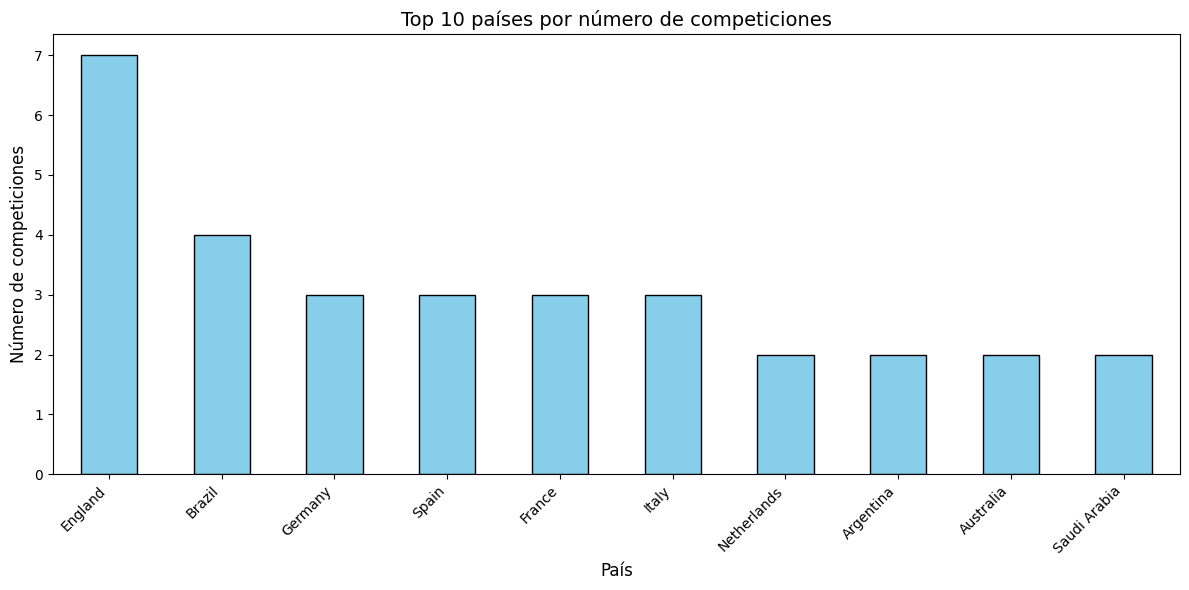

In [ ]:
# --- Filtrar competiciones con excluciones ---
df_filtered = df[~df["AreaName"].isin(["Europe", "World", "Africa", "N/C America", "South America"])]

# --- Número de competiciones por país ---
competitions_by_country = df_filtered["AreaName"].value_counts()

print("\nCompeticiones por país (excluyendo Europe y World):")
print(competitions_by_country.head(10))

# --- Gráfica ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
competitions_by_country.head(10).plot(kind="bar", edgecolor="black", color="skyblue")
plt.title("Top 10 países por número de competiciones", fontsize=14)
plt.xlabel("País", fontsize=12)
plt.ylabel("Número de competiciones", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Tabla de posiciones

In [27]:
# --- Función para obtener standings ---
def fetch_standings(competition_id, season):
    """
    Obtiene el standing (tabla de posiciones) de una competición y temporada.
    """
    url = f"{API_URL}/Standings/{competition_id}/{season}?key={API_KEY}"
    resp = requests.get(url, timeout=10)
    resp.raise_for_status()
    data = resp.json()
    
    df = pd.DataFrame(data)
    
    # Extraer nombre del equipo si está anidado
    if "Team" in df.columns:
        df["TeamName"] = df["Team"].apply(lambda x: x.get("Name") if pd.notnull(x) else None)
    
    # Detectar puntos
    if "Points" not in df.columns and "PointsTotal" in df.columns:
        df["Points"] = df["PointsTotal"]
    
    # Detectar goles si están anidados
    for col in ["GoalsScored", "GoalsAgainst", "GoalDifference"]:
        if col not in df.columns and "Statistics" in df.columns:
            df[col] = df["Statistics"].apply(lambda x: x.get(col) if pd.notnull(x) else None)
    
    # Limpiar valores nulos
    for col in ["Points", "GoalsScored", "GoalsAgainst", "GoalDifference"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)
    
    # Ordenar por puntos descendente
    if "Points" in df.columns:
        df = df.sort_values("Points", ascending=False).reset_index(drop=True)
    
    return df

# --- Función EDA ---
def eda_standings(df, top_n=10):
    """
    Realiza un EDA completo de los standings de manera robusta.
    """
    print("=== Información general ===")
    print("Shape:", df.shape)
    print("Columnas:", df.columns.tolist())
    print("\nPrimeras filas:")
    print(df.head())
    
    # Estadísticas básicas
    stats_fields = ["Points", "GoalsScored", "GoalsAgainst", "GoalDifference"]
    for field in stats_fields:
        if field in df.columns:
            print(f"\nEstadísticas de {field}:")
            print(df[field].describe())
    
    # --- Gráfica 1: Puntos por equipo (Top N, top 3 resaltados) ---
    if "Points" in df.columns and "TeamName" in df.columns:
        df_sorted = df.head(top_n)
        colors = ["gold" if i < 3 else "skyblue" for i in range(len(df_sorted))]
        plt.figure(figsize=(12,6))
        sns.barplot(x="TeamName", y="Points", data=df_sorted, palette=colors)
        plt.title("Puntos de los equipos (Top {})".format(top_n), fontsize=14)
        plt.xlabel("Equipo", fontsize=12)
        plt.ylabel("Puntos", fontsize=12)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    
    # --- Gráfica 2: Goles a favor vs Goles en contra ---
    if all(col in df.columns for col in ["GoalsScored", "GoalsAgainst", "TeamName"]):
        plt.figure(figsize=(12,6))
        df_top = df.head(top_n)
        plt.bar(df_top["TeamName"], df_top["GoalsScored"], label="Goles a favor", color="green", alpha=0.7)
        plt.bar(df_top["TeamName"], df_top["GoalsAgainst"], label="Goles en contra", color="red", alpha=0.7, bottom=df_top["GoalsScored"])
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Goles")
        plt.title("Goles a favor vs Goles en contra (Top {})".format(top_n))
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    # --- Gráfica 3: Histograma de puntos ---
    if "Points" in df.columns:
        plt.figure(figsize=(8,5))
        sns.histplot(df["Points"], bins=10, kde=True, color="skyblue", edgecolor="black")
        plt.title("Distribución de puntos")
        plt.xlabel("Puntos")
        plt.ylabel("Cantidad de equipos")
        plt.tight_layout()
        plt.show()

# --- Ejemplo de uso ---
if __name__ == "__main__":
    df_standings = fetch_standings(competition_id=3, season=2024)
    eda_standings(df_standings)


=== Información general ===
Shape: (11, 14)
Columnas: ['RoundId', 'SeasonId', 'Season', 'SeasonType', 'Name', 'Type', 'StartDate', 'EndDate', 'CurrentWeek', 'CurrentRound', 'Games', 'Standings', 'TeamSeasons', 'PlayerSeasons']

Primeras filas:
   RoundId  SeasonId  Season  SeasonType                     Name Type  \
0     1139       281    2024           3  Preliminary Semi-finals  Cup   
1     1140       281    2024           3        Preliminary Final  Cup   
2     1141       281    2024           3     1st Qualifying Round  Cup   
3     1142       281    2024           3     2nd Qualifying Round  Cup   
4     1143       281    2024           3     3rd Qualifying Round  Cup   

             StartDate              EndDate  CurrentWeek  CurrentRound Games  \
0  2023-06-27T00:00:00  2023-06-27T00:00:00          NaN         False    []   
1  2023-06-30T00:00:00  2023-06-30T00:00:00          NaN         False    []   
2  2023-07-11T00:00:00  2023-07-19T00:00:00          NaN         False 